<a href="https://colab.research.google.com/github/sunha-park/mining/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94_%EA%B3%BC%EC%A0%9C_%EA%B2%BD%EC%98%81%ED%95%99%EB%B6%80_2015199_%EB%B0%95%EC%84%A0%ED%95%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2020년도 건강검진정보 샘플(1만건)

- matplotlib/seaborn/pandas 패키지를 이용하고, 필요하다면 엑셀 또는 파이썬 코드로 데이터 전처리 수행 
- 이용한 차트의 종류가 3가지 이상이어야 함 (산점도, 막대 그래프, 라인 그래프 등)
- 시각화 결과를 해석하고  3가지의 인사이트 도출하기 
- 코드는 github에 올리고 주소 제출

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigMining_아비혁/health_data.csv', encoding='utf-8')

#1.전처리 과정


In [3]:
data.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [5]:
data.describe()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


In [6]:
data['시도코드'] = data['시도코드'].replace([11,26,27,28,29,30,31,36,41,42,43,44,45,46,47,48,49],['서울시','부산시','대구시','인천시','광주시','대전시','울산시','세종시','경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주도'])

In [7]:
data['시도코드'].value_counts(sort=True)

경기도     2495
서울시     1644
부산시      681
경상남도     663
인천시      561
경상북도     523
대구시      495
충청남도     430
전라남도     395
전라북도     392
강원도      343
대전시      331
충청북도     323
광주시      280
울산시      244
제주도      123
세종시       77
Name: 시도코드, dtype: int64

In [8]:
data['성별코드'] = data['성별코드'].replace(['M','F'], ['남자', '여자'])

In [9]:
data['성별코드'].value_counts()

남자    5138
여자    4862
Name: 성별코드, dtype: int64

In [10]:
data['연령대코드(5세단위)'] = data['연령대코드(5세단위)'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], ['0~4세','5~9세','10~14세','15~19세','20~24세','25~29세','30~34세','35~39세','40~44세','45~49세','50~54세','55~59세','60~64세','65~69세','60~74세','75~79세','80~84세','85세+'])

In [11]:
data['연령대코드(5세단위)'].value_counts() # 연령대 40세 이상인 사람들만 존재

50~54세    1798
40~44세    1547
60~64세    1534
55~59세    1498
45~49세    1369
65~69세     865
60~74세     698
75~79세     377
80~84세     259
85세+        55
Name: 연령대코드(5세단위), dtype: int64

In [12]:
data = data.rename(columns={'시도코드':'시도', '성별코드':'성별', '연령대코드(5세단위)':'연령대','신장(5Cm단위)':'신장','체중(5Kg 단위)':'체중'})

In [13]:
data.head(3)

,기준년도,가입자일련번호,시도,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,세종시,남자,40~44세,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,대구시,여자,60~64세,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,서울시,여자,55~59세,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021


##글씨 깨짐 방지

In [28]:
import pandas as pd
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

#sns.set(font_scale=4);

In [15]:
%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [128]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

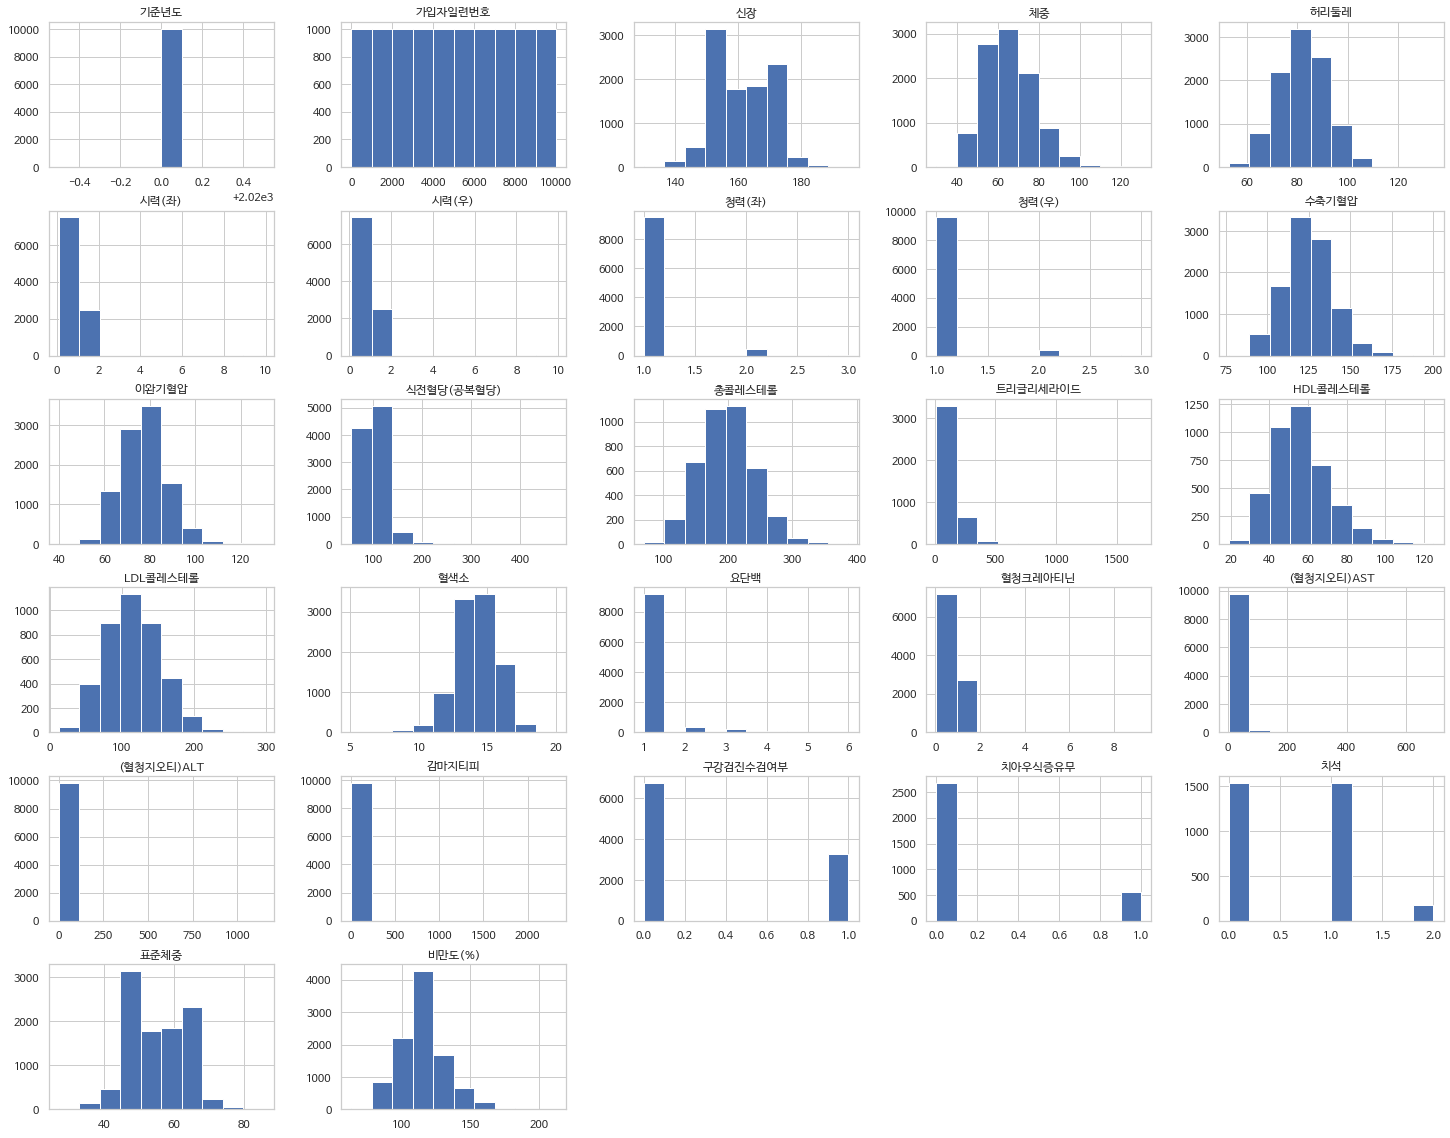

In [30]:
binwidth = 10
data.hist(figsize=(25,20));

#2.비만도 판정 (비만판정과 복부비만 중심으로)

비만도가 120%를 넘으면 비만으로 판정합니다.

표준체중(kg) = (현재신장cm - 100) X 0.9

비만도(%) = (현재체중 ÷표준체중) X 100

In [18]:
data1 = data
data1['표준체중'] = (data1['신장'] - 100) * 0.9
data1['비만도(%)'] = (data1['체중'] / data1['표준체중']) * 100
data1['비만도(%)'] = data1['비만도(%)'].round(1)

# 체중 기준으로 비만도 측정
result = [] 
for i in  data1['비만도(%)']: 
    if i < 80:
      result.append('저체중') 
    elif i < 90:
      result.append('경한저체중')
    elif i < 110:
      result.append('정상저체중')
    elif i < 120:
      result.append('과체중')
    elif i < 130:
      result.append('경도비만')
    elif i < 150:
      result.append('중증도비만')
    elif i < 200:
      result.append('고도비만')
    else:
      result.append('위험한 비만')        
data1['비만판정'] = result


# 허리둘레 기준으로 복부비만 측정
# 여자 기준 허리둘레 85 이상, 남자 기준 허리둘레 90 이상 복부비만
result1 = []
for j,i in zip(data1['성별'], data1['허리둘레']):
  if (i >= 85 and j =='여자') or (i >= 90 and j == '남자'):
    result1.append('Yes')
  elif (i < 85 and j =='여자') or (i < 90 and j == '남자'):
    result1.append('No')
data1['복부비만'] = result1

data1.head()

,기준년도,가입자일련번호,시도,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,표준체중,비만도(%),비만판정,복부비만
0,2020,1,세종시,남자,40~44세,165,60,72.1,1.2,1.5,...,No,No,0,NaN,NaN,12/29/2021,58.5,102.6,정상저체중,No
1,2020,2,대구시,여자,60~64세,150,65,81.0,0.8,0.8,...,No,No,0,NaN,NaN,12/29/2021,45.0,144.4,중증도비만,No
2,2020,3,서울시,여자,55~59세,155,55,70.0,0.6,0.7,...,No,No,0,NaN,NaN,12/29/2021,49.5,111.1,과체중,No
3,2020,4,울산시,남자,60~64세,160,70,90.8,1.0,1.0,...,No,No,1,0.0,0.0,12/29/2021,54.0,129.6,경도비만,Yes
4,2020,5,경기도,여자,55~59세,155,50,75.2,1.5,1.2,...,No,No,0,NaN,NaN,12/29/2021,49.5,101.0,정상저체중,No


In [19]:
print(data1['비만판정'].value_counts())
print('\n')
print(data1['복부비만'].value_counts())

과체중       3232
정상저체중     2637
경도비만      1913
중증도비만     1408
경한저체중      392
고도비만       342
저체중         73
위험한 비만       3
Name: 비만판정, dtype: int64


No     7204
Yes    2796
Name: 복부비만, dtype: int64


##1) 비만판정별 복부비만여부 

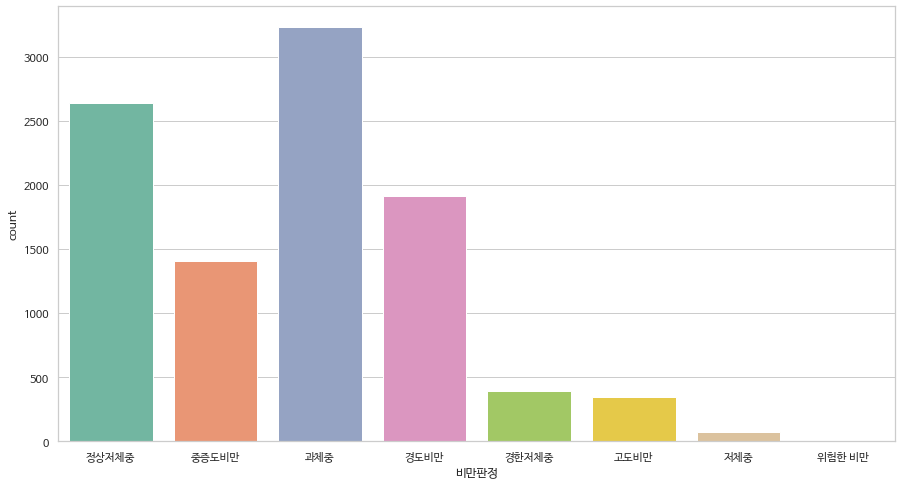

In [31]:
plt.figure(figsize = (15,8))
sns.countplot(data=data1, x='비만판정', palette='Set2');

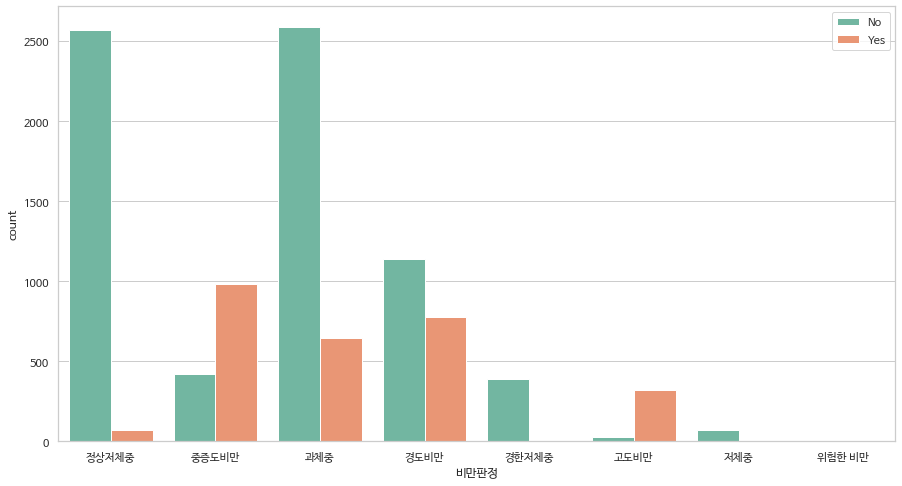

In [32]:
plt.figure(figsize = (15,8))
sns.countplot(data=data1, x='비만판정', hue='복부비만', palette='Set2');
plt.legend(loc = 'upper right');

중증도비만, 경도비만, 과체중, 고도비만 순으로 복부비만인 사람이 많다.

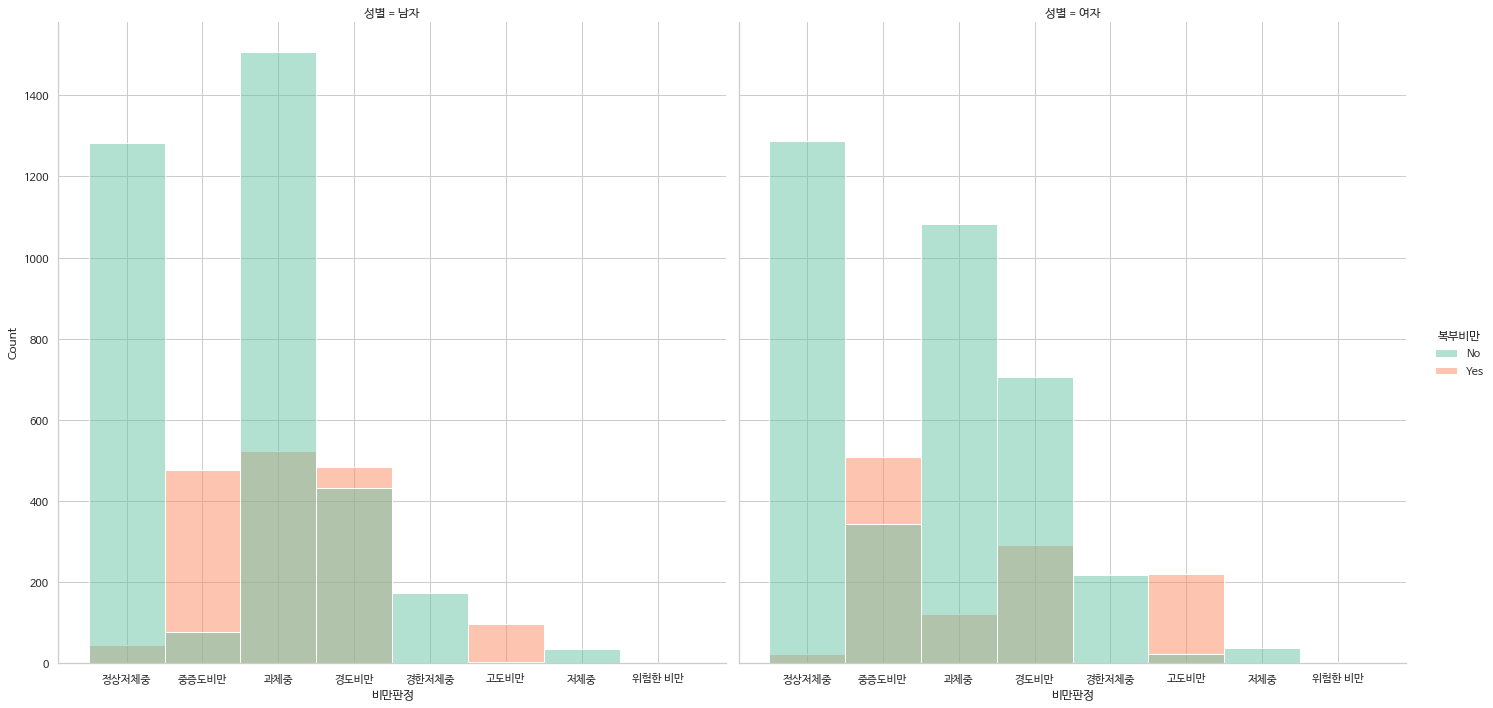

In [33]:
sns.displot(data=data1, x='비만판정', hue = '복부비만', col = '성별', binwidth=15, height=10, palette='Set2');

남자의 경우 과체중, 경도비만, 중증도비만, 고도비만인 사람 순으로 복부비만인 사람의 수가 많은 한편 여자의 경우 중증도비만, 경도비만, 고도비만, 과체중인 사람 순으로 복부비만인 사람의 수가 더 많다. 또한 남녀 모두 정상체중에서도 복부비만인 사람이 많지는 않지만 일부 있다는 점을 알 수 있고 과체중인 사람 중에서는 의외로 복부비만의 비율이 그렇게 높지 않다는 점을 알 수 있다.

##2) 성별에 따른 복부비만여부

In [107]:
data1['성별'].value_counts()

남자    5138
여자    4862
Name: 성별, dtype: int64

In [25]:
print(data.loc[(data['성별'] == '남자') & (data['복부비만'] == 'Yes')].shape[0])
print(data.loc[(data['성별'] == '여자') & (data['복부비만'] == 'Yes')].shape[0])

1629
1167


In [109]:
print('남자 중 복부비만인 사람의 비율: %f\n여자 중 복부비만인 사람의 비율: %f'%(1629/5138*100,1167/4862*100))

남자 중 복부비만인 사람의 비율: 31.704944
여자 중 복부비만인 사람의 비율: 24.002468


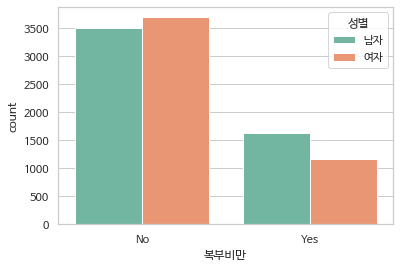

In [34]:
sns.countplot(data=data1, x='복부비만', hue='성별', palette='Set2');

남자 중 복부비만인 사람의 비율은 31%, 여자의 경우는 24%로 남자가 여자보다 복부비만일 확률이 더 높다.

##3) 음주여부에 따른 복부비만여부

In [95]:
data1['복부비만'].value_counts()

No     7204
Yes    2796
Name: 복부비만, dtype: int64

In [47]:
print(data.loc[(data['음주여부'] == 'Yes') & (data['복부비만'] == 'Yes')].shape[0])
print(data.loc[(data['음주여부'] == 'No') & (data['복부비만'] == 'Yes')].shape[0])

1640
1156


In [96]:
print('복부비만인 사람 중 음주를 하는 사람의 비율: %f\n복부비만인 사람 중 음주를 안하는 사람의 비율: %f'%(1640/2796*100,1156/2796*100))

복부비만인 사람 중 음주를 하는 사람의 비율: 58.655222
복부비만인 사람 중 음주를 안하는 사람의 비율: 41.344778


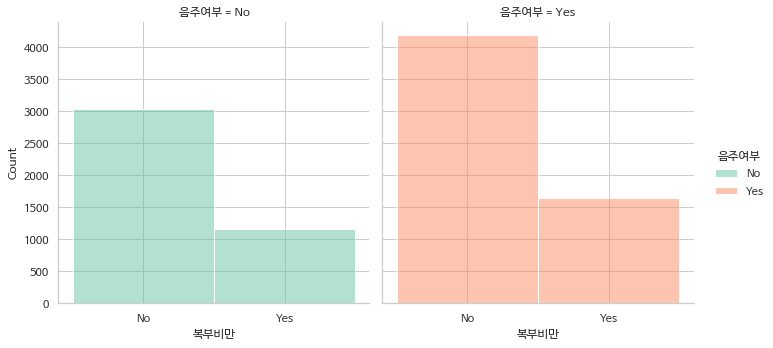

In [88]:
sns.displot(data=data1, x='복부비만',col = '음주여부', hue = '음주여부', palette='Set2');

음주를 한 사람의 복부비만 비율은 58%, 음주를 안한 사람의 복부비만 비율은 41%정도로 음주여부와 복부비만 간에 상관관계가 있는 것으로 확인된다.

##4) 지역별 비만판정

In [50]:
import numpy as np
X = data1.groupby(['시도','성별'],as_index=False).mean()
X1 = X[['시도','성별','신장','체중','허리둘레']]
X1['표준체중'] = (X1['신장'] - 100) * 0.9
X1['비만도(%)'] = (X1['체중'] / X1['표준체중']) * 100
X1['비만도(%)'] = X1['비만도(%)'].round(1)
X1['신장'] = X1['신장'].round(1)
X1['체중'] = X1['체중'].round(1)
X1['허리둘레'] = X1['허리둘레'].round(1)
X1['표준체중'] = X1['표준체중'].round(1)

# 체중 기준으로 비만도 측정
result = [] 
for i in  X1['비만도(%)']: 
    if i < 80:
      result.append('저체중') 
    elif i < 90:
      result.append('경한저체중')
    elif i < 110:
      result.append('정상저체중')
    elif i < 120:
      result.append('과체중')
    elif i < 130:
      result.append('경도비만')
    elif i < 150:
      result.append('중증도비만')
    elif i < 200:
      result.append('고도비만')
    else:
      result.append('위험한 비만')        
X1['비만판정'] = result

# 허리둘레 기준으로 복부비만 측정
# 여자 기준 허리둘레 85 이상, 남자 기준 허리둘레 90 이상 복부비만
result1 = []
for j,i in zip(X1['성별'], X1['허리둘레']):
  if (i >= 85 and j =='여자') or (i >= 90 and j == '남자'):
    result1.append('Yes')
  elif (i < 85 and j =='여자') or (i < 90 and j == '남자'):
    result1.append('No')
X1['복부비만'] = result1

X1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,시도,성별,신장,체중,허리둘레,표준체중,비만도(%),비만판정,복부비만
0,강원도,남자,167.6,70.4,85.9,60.8,115.7,과체중,No
1,강원도,여자,153.5,55.5,79.4,48.2,115.2,과체중,No
2,경기도,남자,167.7,70.5,86.9,60.9,115.7,과체중,No
3,경기도,여자,154.3,56.1,78.3,48.9,114.7,과체중,No
4,경상남도,남자,167.6,69.6,85.8,60.8,114.4,과체중,No


In [54]:
print(X1.loc[(X1['비만판정'] == '경도비만') & (X1['성별'] == '여자')].shape[0])
print(X1.loc[(X1['비만판정'] == '경도비만') & (X1['성별'] == '남자')].shape[0])

1
0


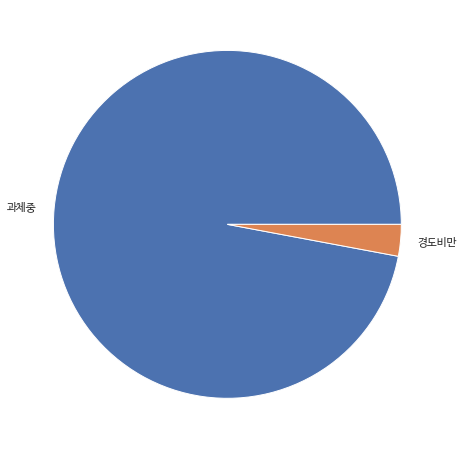

In [51]:
x = X1['비만판정'].value_counts()
x1 = x.index
y = x.values

plt.figure(figsize = (10,8))
plt.pie(y, labels = x1)
plt.show()

지역 및 성별 별로 비만 현황을 측정한 결과 과체중 33, 경도비만 1 값이 나옴.
기존 체중 컬럼과 신장 컬럼이 각각 5kg, 5cm 단위로 묶여 있었기 때문으로 추론해볼 수 있음. 이는 의미있는 결과라고 보기 어려움

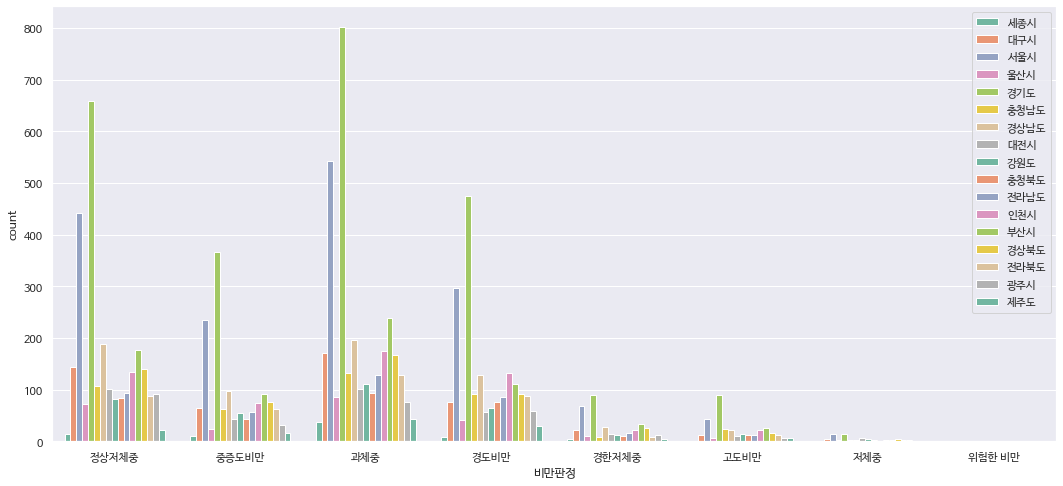

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(data=data1, x='비만판정', hue='시도', palette='Set2');
plt.legend(loc = 'upper right');

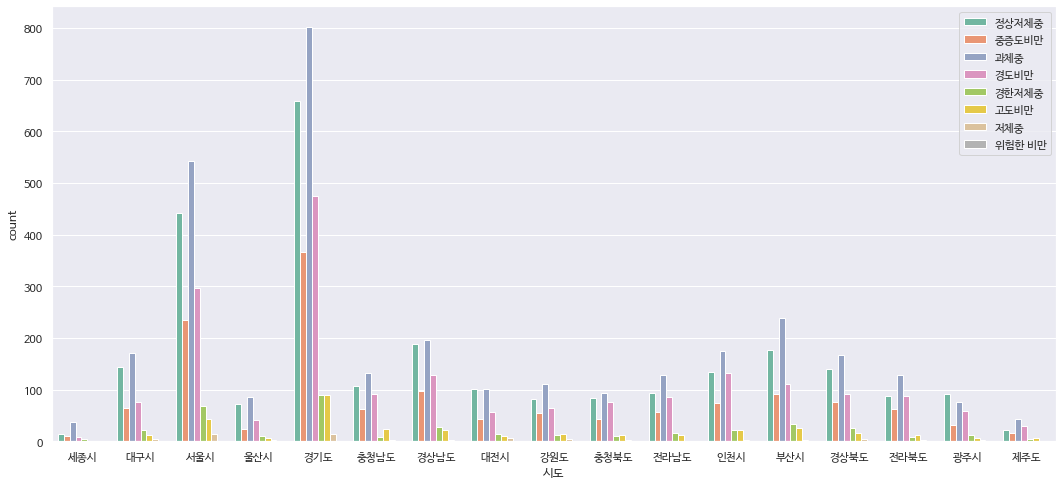

In [ ]:
#위 그래프와 같은 그래프. X축과 hue만 바꿨음.
plt.figure(figsize = (18,8))
sns.countplot(data=data1, x='시도', hue='비만판정', palette='Set2');
plt.legend(loc = 'upper right');

In [ ]:
data1['시도'].value_counts()

경기도     2495
서울시     1644
부산시      681
경상남도     663
인천시      561
경상북도     523
대구시      495
충청남도     430
전라남도     395
전라북도     392
강원도      343
대전시      331
충청북도     323
광주시      280
울산시      244
제주도      123
세종시       77
Name: 시도, dtype: int64

도시별로 비만판정을 비교해 본 결과 광주시를 제외한 모든 지역에서 과체중인 사람이 가장 많았다. 광주시에서는 정상 체중 다음으로 과체중인 사람이 많다.

##5) 연령대별 비만판정 살펴보기

In [ ]:
# 연령대로도 한번 살펴보자.

In [55]:
data1['연령대'].value_counts()

50~54세    1798
40~44세    1547
60~64세    1534
55~59세    1498
45~49세    1369
65~69세     865
60~74세     698
75~79세     377
80~84세     259
85세+        55
Name: 연령대, dtype: int64

In [58]:
print(data1.loc[(data1['연령대'] == '50~54세') & (data1['비만판정'] == '과체중')].shape[0])

626


In [63]:
data_fat = data1.loc[(data1['비만판정'] == '과체중')]

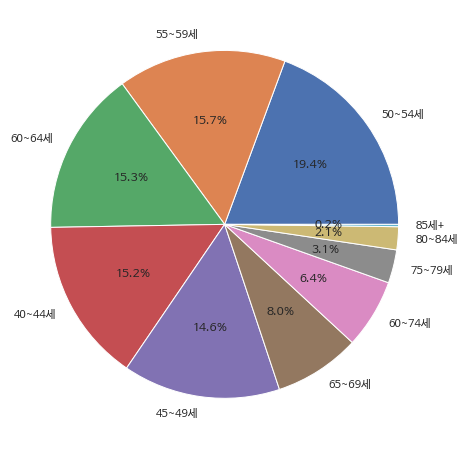

In [68]:
x = data_fat['연령대'].value_counts()
x1 = x.index
y = x.values

plt.figure(figsize = (10,8))
plt.pie(y, labels = x1, autopct='%1.1f%%')
plt.show()

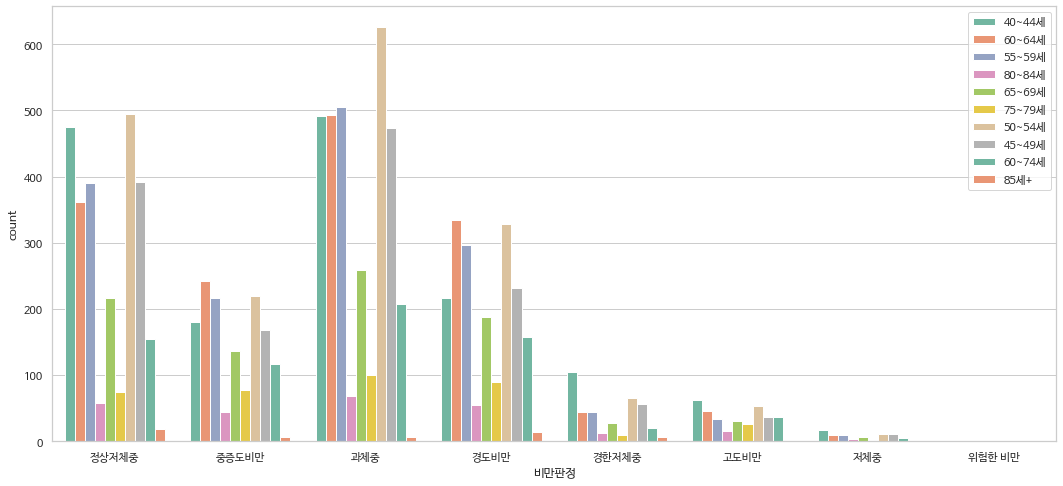

In [56]:
plt.figure(figsize = (18,8))
sns.countplot(data=data1, x='비만판정', hue='연령대', palette='Set2');
plt.legend(loc = 'upper right');

표본 수가 가장 많은 50-54세인 사람들의 과체중 수치가 가장 높게 나타나고 있고 55-59세에서도 사람 표본 수에 비해 과체중 수치가 높게 나타나고 있음을 알 수 있다.

##6) 총정리

과체중 이상인 사람들의 대부분이 복부비만이 있을 것이라고 생각했지만 생각보다 그 비율이 높지는 않았다. 복부비만은 음주 여부와 관련이 있지 않을까해서 음주와 복부비만간의 관계를 비교해본 결과 음주를 한 사람의 복부비만 비율은 58%, 음주를 하지 않은 사람의 복부비만 비율은 41%정도로 음주여부와 복부비만 간에 상관관계가 있는 것으로 확인된다. 지역별로 특산물도 다르고 선호하는 음식 간이 다르다는 점에서 비만도를 측정해보고 싶었지만 grouopby함수로 시도별과 성별코드로 묶어 확인해본 결과 의미있는 결과는 도출하지 못했다. 이는 사람의 표본 수가 적고 또 신체나 체중에서 5 단위로 묶었기 때문이라고 판단된다. 연령대로 비만판정을 확인해본 결과 50-54세와 55-59세가 과체중 비율이 높게 나타났다.

#3.당뇨 진단 판정

8시간 이상 금식 후 측정한 혈당농도로, 당뇨병 진단에 이용된다. 126mg/dL 이상이면 당뇨병, 100~125mg/dL이면 공복혈당장애로 의심하고, 다른 날 다시 검사하여 확인한다.

In [70]:
# 공복혈당 기준으로 당뇨 진단 여부
result = [] 
for i in  data1['식전혈당(공복혈당)']: 
    if i >= 100 and i <= 125:
      result.append('공복혈당장애') 
    elif i >= 126:
      result.append('당뇨병')
    else:
      result.append('정상')        
data1['당뇨병진단'] = result
data1.head(3)

,기준년도,가입자일련번호,시도,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),...,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,표준체중,비만도(%),비만판정,복부비만,당뇨병진단
0,2020,1,세종시,남자,40~44세,165,60,72.1,1.2,1.5,...,No,0,NaN,NaN,12/29/2021,58.5,102.6,정상저체중,No,정상
1,2020,2,대구시,여자,60~64세,150,65,81.0,0.8,0.8,...,No,0,NaN,NaN,12/29/2021,45.0,144.4,중증도비만,No,정상
2,2020,3,서울시,여자,55~59세,155,55,70.0,0.6,0.7,...,No,0,NaN,NaN,12/29/2021,49.5,111.1,과체중,No,공복혈당장애


In [71]:
data1['당뇨병진단'].value_counts()

정상        5336
공복혈당장애    3657
당뇨병       1007
Name: 당뇨병진단, dtype: int64

##1) 비만판정 별 당뇨병진단결과

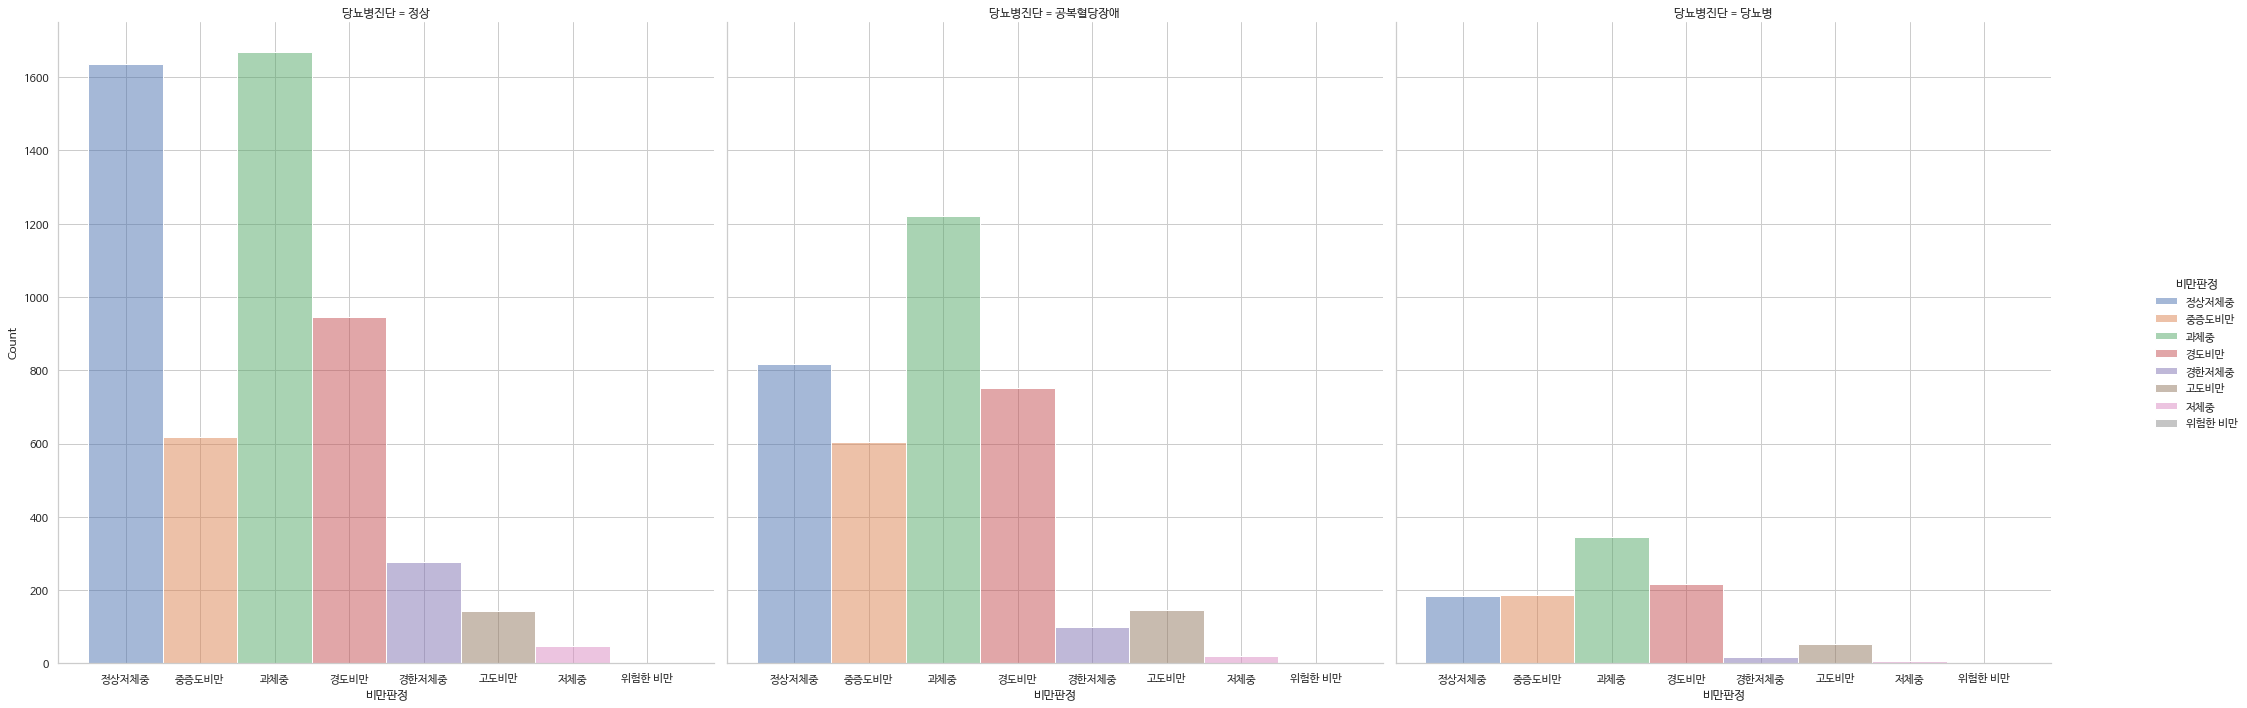

In [72]:
sns.displot(data1, x="비만판정", hue="비만판정", col = "당뇨병진단", binwidth=10, height=10, facet_kws=dict(margin_titles=True));

In [76]:
dang = data1.loc[((data1['당뇨병진단'] == '공복혈당장애') | (data1['당뇨병진단'] == '당뇨병'))]

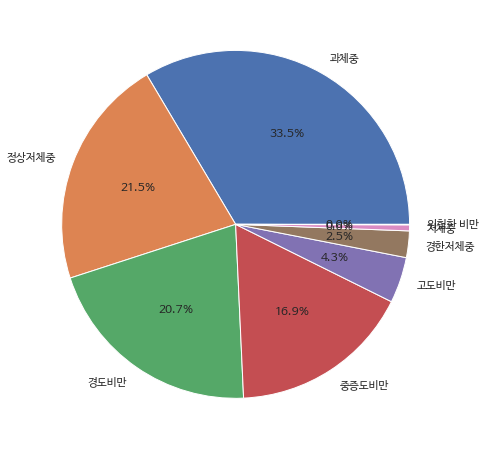

In [77]:
x = dang['비만판정'].value_counts()
x1 = x.index
y = x.values

plt.figure(figsize = (10,8))
plt.pie(y, labels = x1, autopct='%1.1f%%')
plt.show()

순서대로 과체중, 정상저체중, 경도비만, 중증도비만 등 이러한 사람 중에 공복할당장애 혹은 당뇨로 측정받은 사람이 많다.

###1-1 비만판정 별 공복혈당 살펴보기

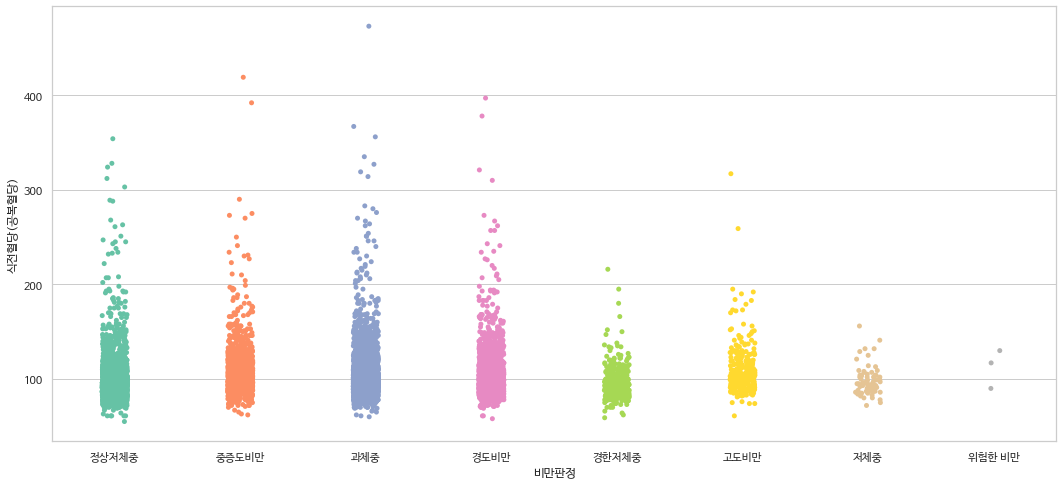

In [ ]:
plt.figure(figsize = (18,8))
sns.stripplot(data = data1, x = '비만판정', y= '식전혈당(공복혈당)', palette='Set2');

정상체중과 비만이상 체중의 공복혈당은 별 차이 없는 것을 알 수 있음.

##2) 성별에 따른 당뇨병진단결과

In [81]:
data1.loc[(data1['당뇨병진단'] == '공복혈당장애') | (data1['당뇨병진단'] == '당뇨병')].shape[0]

4664

In [80]:
print(data1.loc[((data1['성별'] == '여자') & (data1['당뇨병진단'] == '공복혈당장애') | (data1['당뇨병진단'] == '당뇨병'))].shape[0])
print(data1.loc[((data1['성별'] == '남자') & (data1['당뇨병진단'] == '공복혈당장애') | (data1['당뇨병진단'] == '당뇨병'))].shape[0])

2554
3117


In [82]:
print('공복혈당장애와 당뇨병인 사람중 여성의 비율: %f\n공복혈당장애와 당뇨병인 사람중 남성의 비율: %f'%(2554/4664*100, 3117/4664*100))

공복혈당장애와 당뇨병인 사람중 여성의 비율: 54.759863
공복혈당장애와 당뇨병인 사람중 남성의 비율: 66.831046


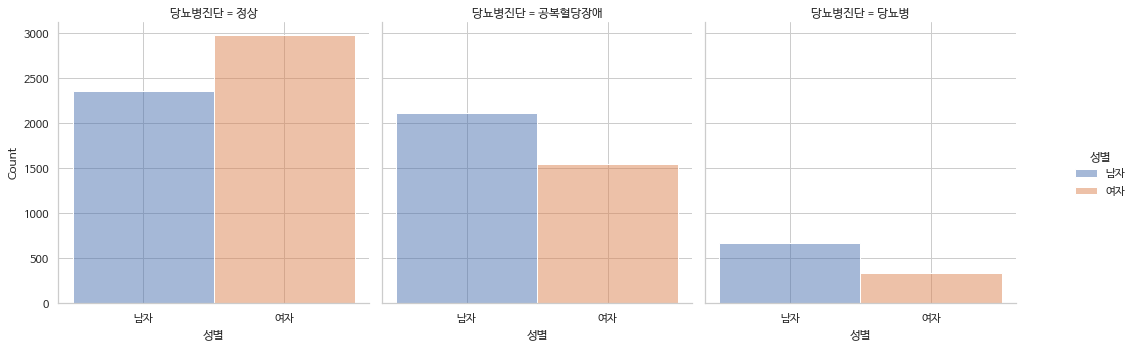

In [78]:
sns.displot(data1, x="성별", hue="성별", col = "당뇨병진단", facet_kws=dict(margin_titles=True));

공복혈당장애 혹은 당뇨로 측정 받은 남자는 66%, 여자는 54%로 남자가 여자보다 당뇨위험도가 더 높다고 볼 수 있다.

##3) 음주여부에 따른 당뇨병진단결과

In [90]:
data1['당뇨병진단'].value_counts()

정상        5336
공복혈당장애    3657
당뇨병       1007
Name: 당뇨병진단, dtype: int64

In [84]:
print(data1.loc[((data1['음주여부'] == 'Yes') & (data1['당뇨병진단'] == '공복혈당장애') | (data1['당뇨병진단'] == '당뇨병'))].shape[0])
print(data1.loc[((data1['음주여부'] == 'No') & (data1['당뇨병진단'] == '공복혈당장애') | (data1['당뇨병진단'] == '당뇨병'))].shape[0])

3239
2432


In [94]:
print('당뇨로 진단받은 사람 중 음주를 하는 사람의 비율: %f\n 당뇨로 진단받은 사람 중 음주를 안하는 사람의 비율: %f'%(3239/4664*100,2432/4664*100))

당뇨로 진단받은 사람 중 음주를 하는 사람의 비율: 69.446827
 당뇨로 진단받은 사람 중 음주를 안하는 사람의 비율: 52.144082


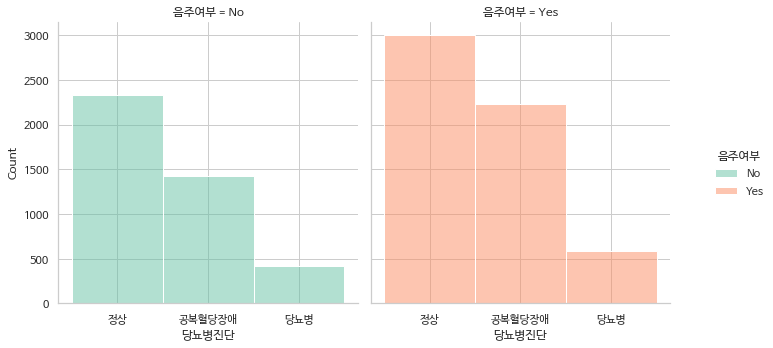

In [89]:
sns.displot(data1, x="당뇨병진단", col="음주여부", hue = "음주여부", palette='Set2',facet_kws=dict(margin_titles=True));

당뇨로 진단받은 사람 중 음주를 하는 사람의 비율은 69%, 당뇨로 진단받은 사람 중 음주를 안하는 사람의 비율은 52%로 당뇨와 음주여부에 상관관계가 있는 것을 알 수 있다.

##4) 지역별 당뇨병진단결과

In [98]:
dang1 = data1.loc[((data1['당뇨병진단'] == '공복혈당장애') | (data1['당뇨병진단'] == '당뇨병'))]
dang1.head(3)

,기준년도,가입자일련번호,시도,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),...,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,표준체중,비만도(%),비만판정,복부비만,당뇨병진단
2,2020,3,서울시,여자,55~59세,155,55,70.0,0.6,0.7,...,No,0,NaN,NaN,12/29/2021,49.5,111.1,과체중,No,공복혈당장애
3,2020,4,울산시,남자,60~64세,160,70,90.8,1.0,1.0,...,No,1,0.0,0.0,12/29/2021,54.0,129.6,경도비만,Yes,당뇨병
4,2020,5,경기도,여자,55~59세,155,50,75.2,1.5,1.2,...,No,0,NaN,NaN,12/29/2021,49.5,101.0,정상저체중,No,공복혈당장애


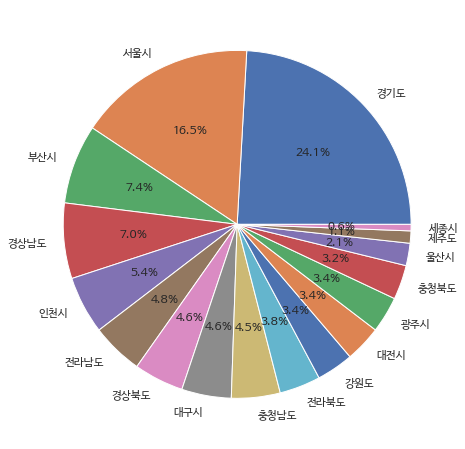

In [100]:
x = dang['시도'].value_counts()
x1 = x.index
y = x.values

plt.figure(figsize = (10,8))
plt.pie(y, labels = x1, autopct='%1.1f%%')
plt.show()

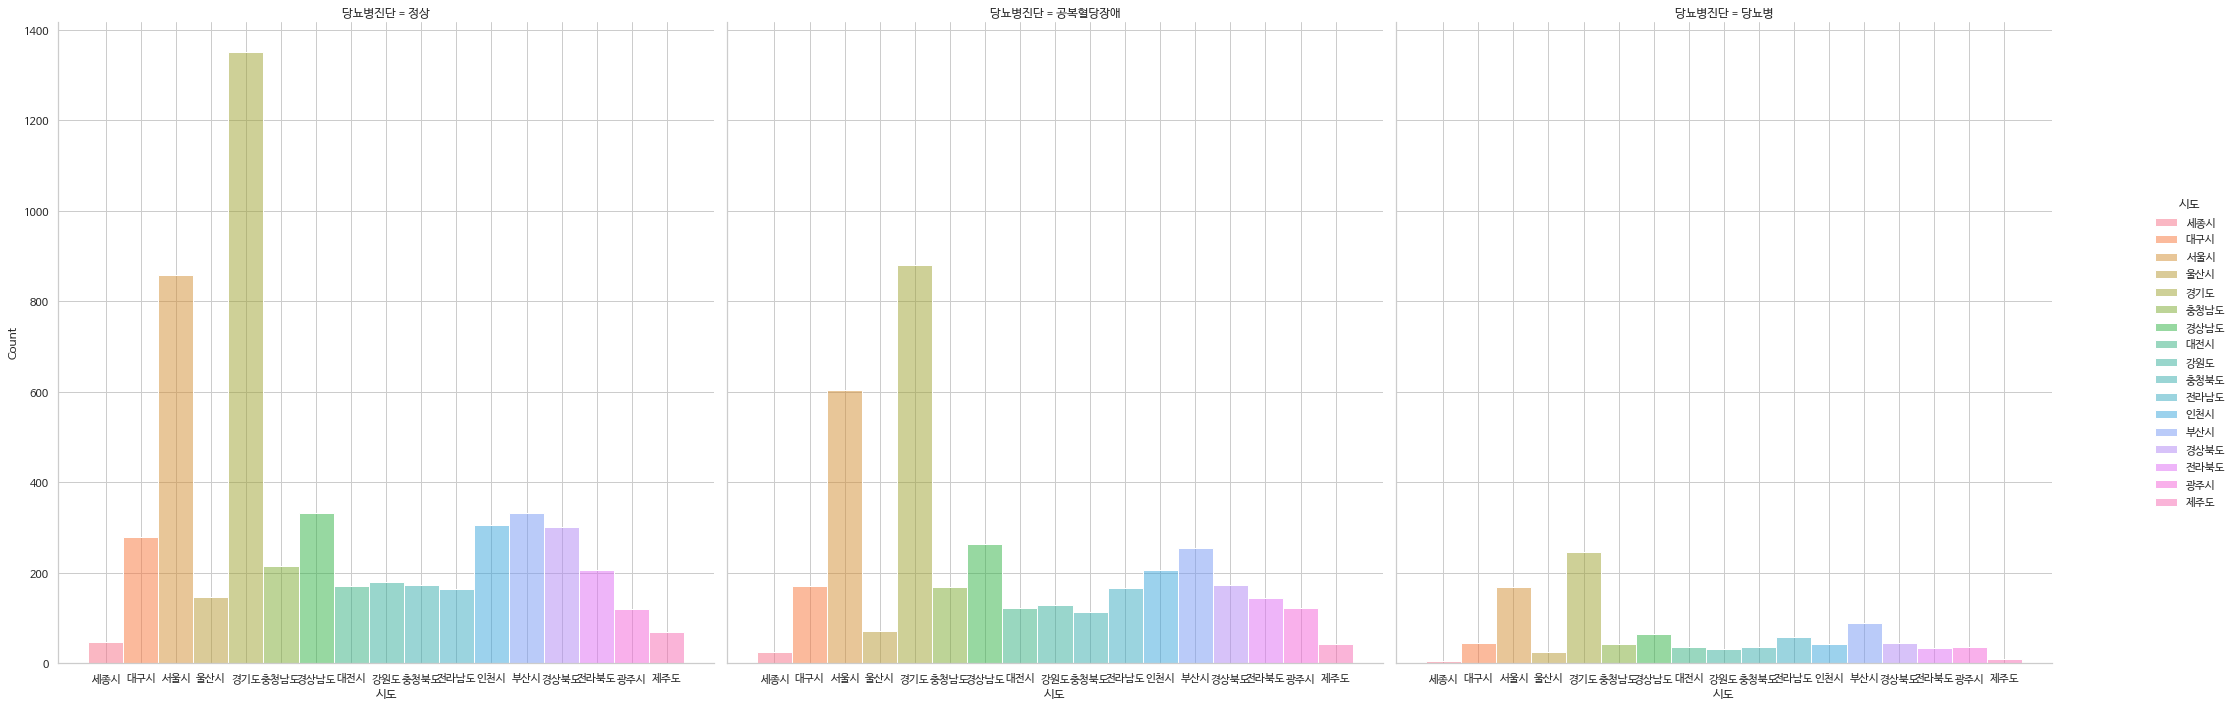

In [ ]:
sns.displot(data1, x="시도", hue="시도", col = "당뇨병진단", binwidth=10, height=10, facet_kws=dict(margin_titles=True));

In [ ]:
data1['시도'].value_counts()

경기도     2475
서울시     1629
부산시      675
경상남도     660
인천시      555
경상북도     517
대구시      493
충청남도     426
전라남도     390
전라북도     384
강원도      340
대전시      328
충청북도     321
광주시      278
울산시      243
제주도      122
세종시       76
Name: 시도, dtype: int64

경기도, 서울에서 공복할당장애 및 당뇨 판정을 받은 사람이 많다.

###4-1 지역별 공복혈당 살펴보기

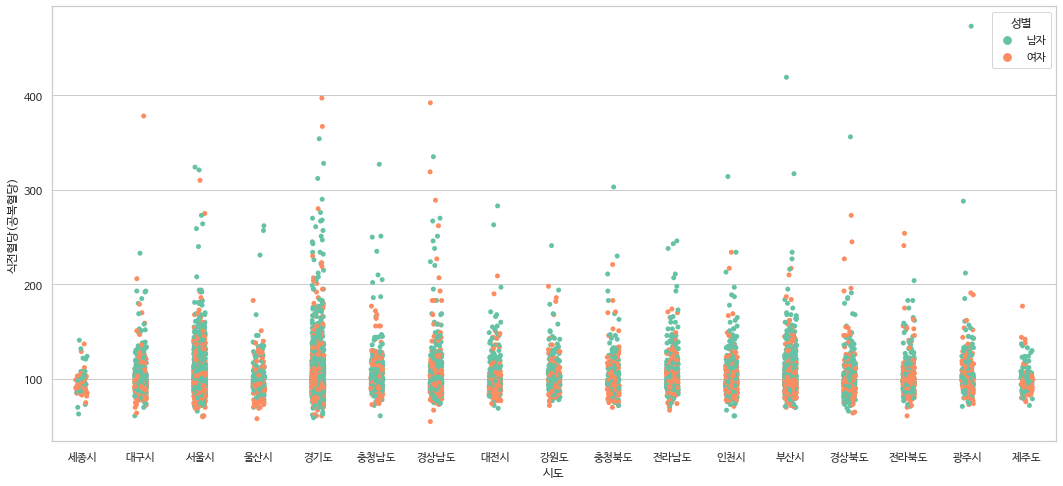

In [ ]:
plt.figure(figsize = (18,8))
sns.stripplot(data = data1, x = '시도', y= '식전혈당(공복혈당)', hue = '성별', palette='Set2');

##5) 연령대별 당뇨병진단결과

In [101]:
age = data1.loc[((data1['당뇨병진단'] == '공복혈당장애') | (data1['당뇨병진단'] == '당뇨병'))]

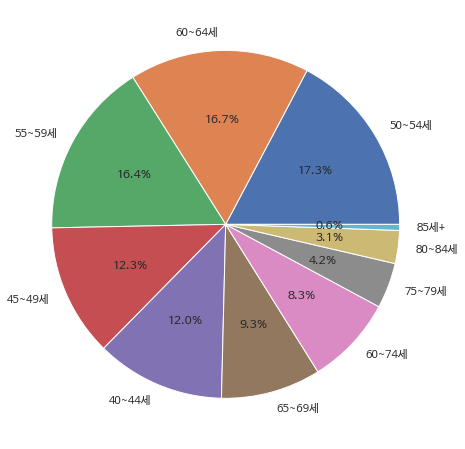

In [103]:
x = age['연령대'].value_counts()
x1 = x.index
y = x.values

plt.figure(figsize = (10,8))
plt.pie(y, labels = x1, autopct='%1.1f%%')
plt.show()

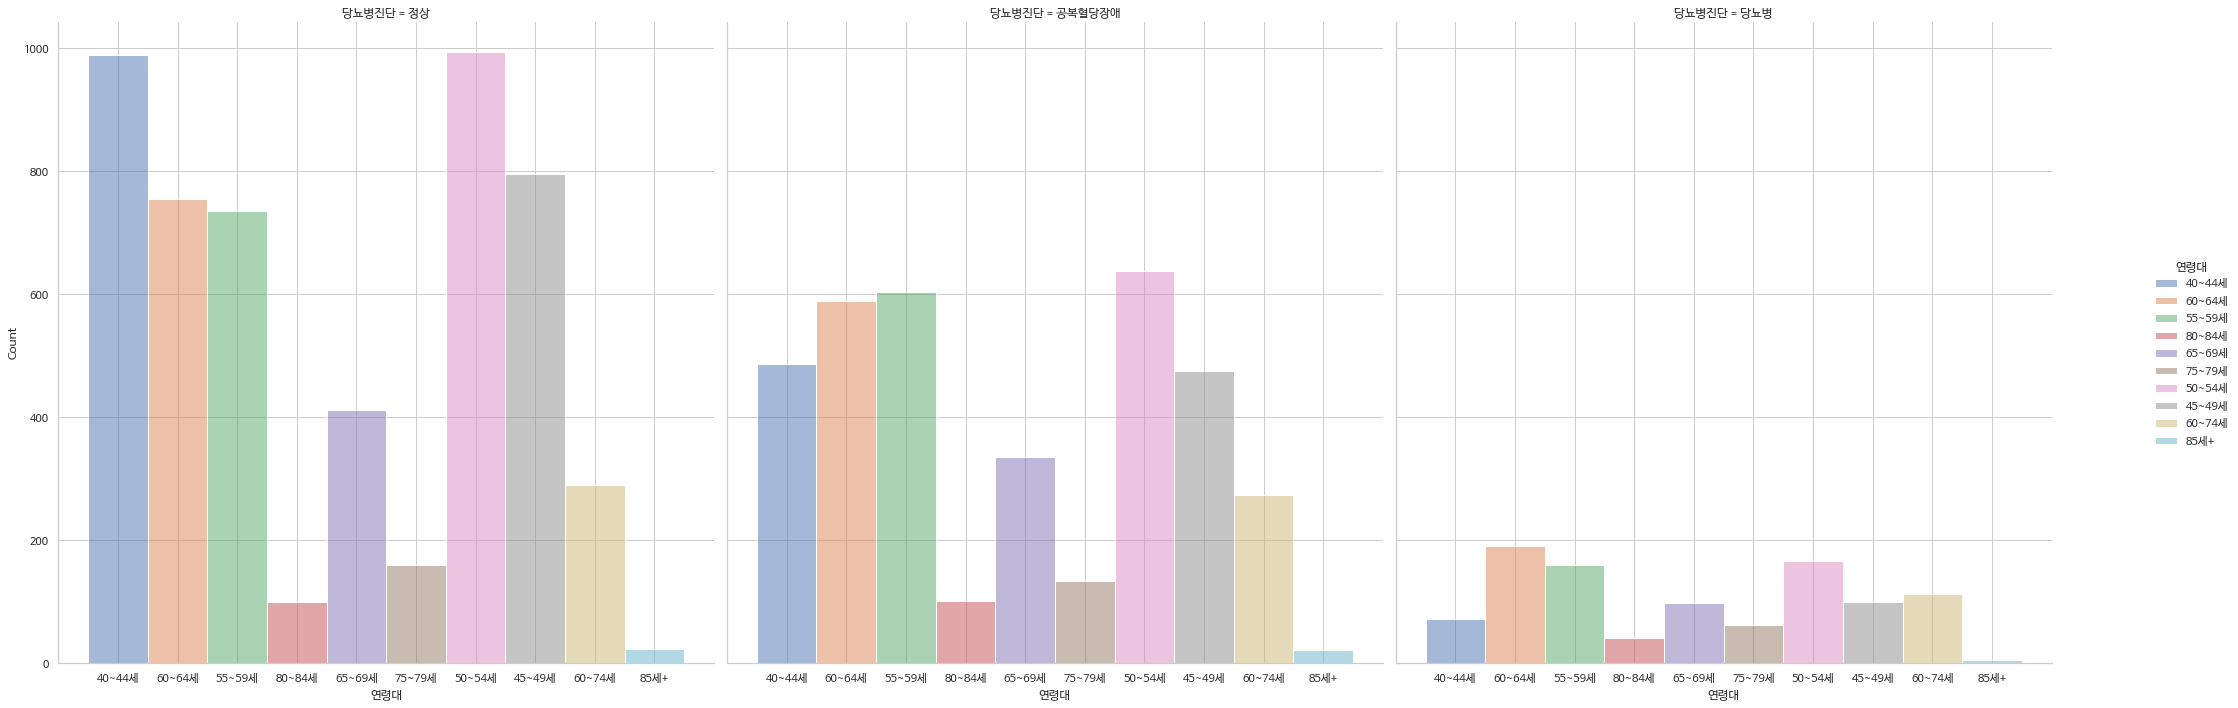

In [ ]:
sns.displot(data1, x="연령대", hue="연령대", col = "당뇨병진단", binwidth=20, height=10, facet_kws=dict(margin_titles=True));

50-54세, 60-64세, 55-59세 순으로 공복혈당장애 및 당뇨병으로 판정된 사람이 많다.

##6) 총정리

체중이 많이 나갈수록 당뇨로 판정될 확률이 높지 않을까 해서 비만판정결과 기준 당뇨병진단결과를 확인해보았다. 과체중, 정상저체중, 경도비만, 중증도비만 순서대로 공복할당장애 혹은 당뇨로 측정받은 사람이 많았고 정상체중 또한 당뇨 판정 확률이 높다는 점에서 비만으로만 따지면 안된다. 성별별로 확인해본 결과 남자가 여자보다 당뇨 걸린 사람의 비율이 더 많았다. 음주 또한 당과 관련이 있다고 생각하여 비교해본 결과 당뇨로 진단받은 사람 중 음주를 하는 사람이 비율이 안하는 사람보다 더 높았다는 점에서 당뇨와 음주여부에 상관관계가 있다는 점을 알 수 있다. 지역별로 봤을 때는 경기도와 서울에서 당뇨 판정을 받은 사람이 많았고 나이 순으로는 50-54세, 60-64세, 55-59세 순으로 많았다.

#4.고혈압 진단 판정


**수축기 혈압**

심장이 수축할 때 혈관에 가해지는 압력으로, 고혈압의 진단에 사용된다. 수축기 혈압이 140mmHg 이상인 경우 고혈압, 120~129mmHg는 주의혈압, 130mmHg 이상인 경우 고혈압 전단계를 의심하며 다른 날 다시 측정하여 확인한다.

**이완기 혈압**

심장이 이완할 때 혈관에 가해지는 압력으로, 고혈압의 진단에 사용된다. 이완기 혈압이 90mmHg 이상인 경우 고혈압, 80mmHg 이상인 경우 고혈압 전단계를 의심하며 다른 날 다시 측정하여 확인한다.

In [110]:
data1.info()
#수축기혈압, 이완기혈압 모두 null값을 가짐

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준년도        10000 non-null  int64  
 1   가입자일련번호     10000 non-null  int64  
 2   시도          10000 non-null  object 
 3   성별          10000 non-null  object 
 4   연령대         10000 non-null  object 
 5   신장          10000 non-null  int64  
 6   체중          10000 non-null  int64  
 7   허리둘레        10000 non-null  float64
 8   시력(좌)       10000 non-null  float64
 9   시력(우)       10000 non-null  float64
 10  청력(좌)       10000 non-null  int64  
 11  청력(우)       10000 non-null  int64  
 12  수축기혈압       9912 non-null   float64
 13  이완기혈압       9912 non-null   float64
 14  식전혈당(공복혈당)  9912 non-null   float64
 15  총콜레스테롤      4044 non-null   float64
 16  트리글리세라이드    4044 non-null   float64
 17  HDL콜레스테롤    4044 non-null   float64
 18  LDL콜레스테롤    3977 non-null   float64
 19  혈색소         9912 non-null 

In [111]:
data2 = data1
data2.dropna(subset=['수축기혈압'], inplace = True)

In [112]:
print(data2['수축기혈압'].isnull().value_counts())
print(data2['이완기혈압'].isnull().value_counts())

False    9912
Name: 수축기혈압, dtype: int64
False    9912
Name: 이완기혈압, dtype: int64


In [113]:
# 혈압 기준으로 고혈압 측정
result = []
for i,j in zip(data2['수축기혈압'], data2['이완기혈압']):
  if (i >= 140) or (j >= 90):
    result.append('고혈압')
  elif (i >= 120) and (i <= 129):
    result.append('주의혈압')
  elif (i >= 130) or (j >= 80):
    result.append('고혈압 전단계')
  else:
    result.append('정상')

data2['고혈압진단'] = result

data2.head(3)

,기준년도,가입자일련번호,시도,성별,연령대,신장,체중,허리둘레,시력(좌),시력(우),...,구강검진수검여부,치아우식증유무,치석,데이터공개일자,표준체중,비만도(%),비만판정,복부비만,당뇨병진단,고혈압진단
0,2020,1,세종시,남자,40~44세,165,60,72.1,1.2,1.5,...,0,NaN,NaN,12/29/2021,58.5,102.6,정상저체중,No,정상,주의혈압
1,2020,2,대구시,여자,60~64세,150,65,81.0,0.8,0.8,...,0,NaN,NaN,12/29/2021,45.0,144.4,중증도비만,No,정상,정상
2,2020,3,서울시,여자,55~59세,155,55,70.0,0.6,0.7,...,0,NaN,NaN,12/29/2021,49.5,111.1,과체중,No,공복혈당장애,주의혈압


In [114]:
pd.set_option('display.max_columns', None)
data2.describe()

,기준년도,가입자일련번호,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석,표준체중,비만도(%)
count,9912.0,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,4044.000000,4044.000000,4044.000000,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,9912.000000,3251.000000,3251.000000,9912.000000,9912.000000
mean,2020.0,5004.170400,161.056800,63.093220,82.343362,0.935997,0.937258,1.049637,1.043987,124.669693,76.789750,103.777542,198.269041,132.801434,56.158309,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.327986,0.175331,0.579514,54.951120,115.265587
std,0.0,2888.053222,9.172475,12.206237,9.559553,0.657467,0.623505,0.226304,0.215629,14.629865,9.931527,24.649816,41.945872,92.919969,14.484780,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.469503,0.380308,0.591269,8.255227,17.054907
min,2020.0,1.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,77.000000,40.000000,55.000000,70.000000,14.000000,19.000000,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000,27.000000,63.500000
25%,2020.0,2502.750000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,115.000000,70.000000,91.000000,169.000000,77.000000,46.000000,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000,49.500000,102.600000
50%,2020.0,5007.500000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,124.000000,77.000000,99.000000,197.000000,111.000000,54.000000,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000,54.000000,111.100000
75%,2020.0,7505.250000,170.000000,70.000000,88.625000,1.200000,1.200000,1.000000,1.000000,134.000000,83.000000,109.000000,225.000000,160.000000,65.000000,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000,63.000000,123.675000
max,2020.0,10000.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,3.000000,200.000000,130.000000,473.000000,387.000000,1701.000000,125.000000,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000,85.500000,212.100000


##1) 수축기혈압과 이완기혈압의 상관관계

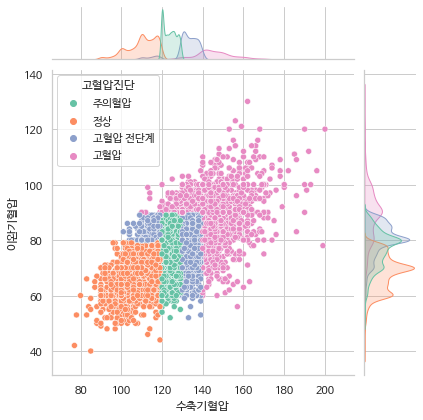

In [117]:
sns.jointplot(data = data2, x="수축기혈압", y="이완기혈압",palette='Set2', hue="고혈압진단");

##2) 고혈압인 사람 중 당뇨병진단결과 확인

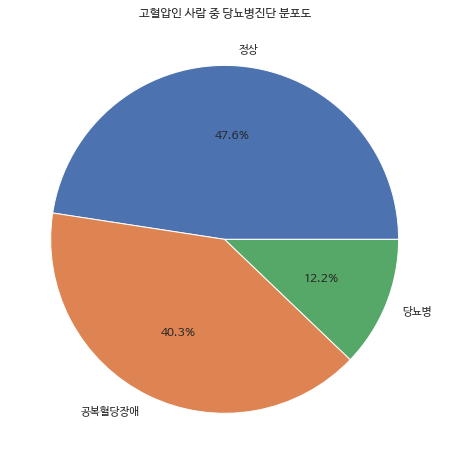

In [136]:
blood = data1.loc[((data1['고혈압진단'] == '주의혈압') | (data1['고혈압진단'] == '고혈압 전단계') | (data1['고혈압진단'] == '고혈압'))]
x = blood['당뇨병진단'].value_counts()
x1 = x.index
y = x.values

plt.figure(figsize = (10,8))
plt.pie(y, labels = x1, autopct='%1.1f%%')
plt.title('고혈압인 사람 중 당뇨병진단 분포도')
plt.show()

##3) 고혈압인 사람 중 복부비만인 사람분포 확인하기

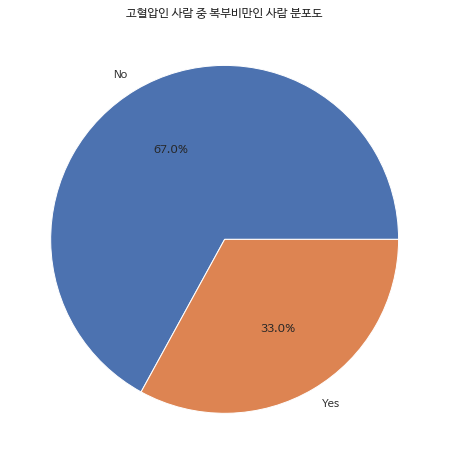

In [137]:
x = blood['복부비만'].value_counts()
x1 = x.index
y = x.values

plt.figure(figsize = (10,8))
plt.pie(y, labels = x1, autopct='%1.1f%%')
plt.title('고혈압인 사람 중 복부비만인 사람 분포도')
plt.show()

##4) 고혈압,당뇨병진단,복부비만 관계 살펴보기

In [126]:
sns.set(font_scale=4);
sns.set(rc={'figure.figsize':(15, 5)})

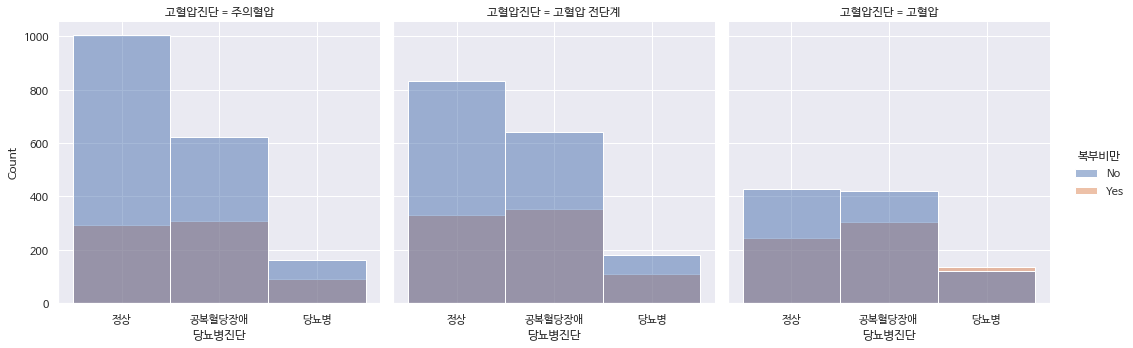

In [138]:
sns.displot(blood, x="당뇨병진단", hue="복부비만",col = '고혈압진단');

고혈압 증상을 가지고 있는 사람들 중 당뇨병진단결과가 공복혈당장애, 정상, 당뇨병 순으로 높았고 고혈압일 때 당뇨병으로 진단 받은 사람 중 복부비만인 사람이 복부비만이 아닌 사람보다 더 높았다는 점에서 당뇨병을 가진 사람이 고혈압이고 복부비만일 확률이 높음으로 해석할 수 있다.

#5.상관관계 분석하기

r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계

r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계

r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계

r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계

r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계

r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계

r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [ ]:
data2 = data1[['비만판정','복부비만','당뇨병진단','고혈압진단']]
data2['복부비만'] = data1['복부비만'].replace(['Yes','No'],[1,0])
data2['비만판정'] = data1['비만판정'].replace(['저체중','경한저체중','정상저체중','과체중','경도비만','중증도비만','고도비만','위험한비만'],[0,1,2,3,4,5,6,7])
data2['당뇨병진단'] = data1['당뇨병진단'].replace(['정상','공복혈당장애','당뇨병'],[0,1,2])
data2['고혈압진단'] = data1['고혈압진단'].replace(['정상','주의혈압','고혈압 전단계','고혈압'],[0,1,2,3])

In [176]:
data_corr = data2.corr()

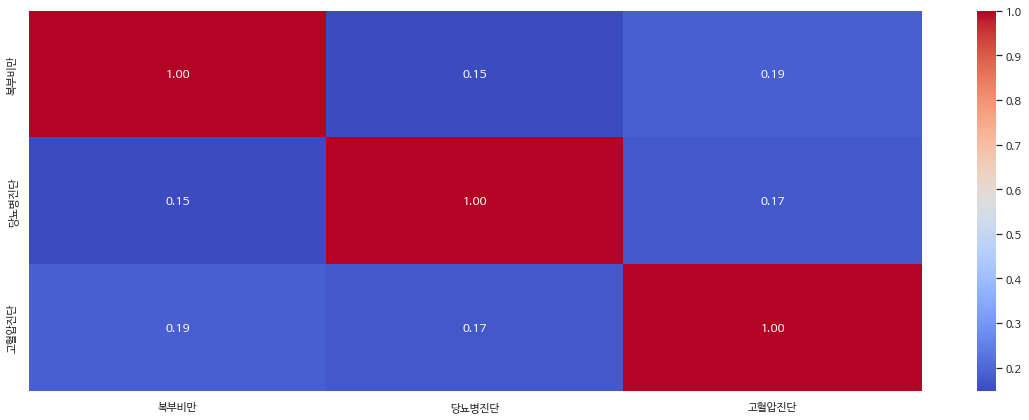

In [177]:
# 위에서 구한 상관계수를 heatmap을 통해 표현해 봅니다.
plt.figure(figsize=(20, 7))
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap="coolwarm");

고혈압진단, 당뇨병진단, 복부비만여부는 약하지만 어느정도의 양의 상관관계가 있음을 알 수 있다.